In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import matplotlib.gridspec as gridspec

### Fake data

In [74]:
df_v = pd.DataFrame(index=pd.Index([0.0, 0.3], name='lambda'), columns=['A', 'B', 'C', 'D', 'E'])
v_true = [1/6, 2/6, 3/6, 4/6, 5/6]
df_v.loc[0.0] = [np.random.normal(v, 0.1) for v in v_true]
df_v.loc[0.3] = [np.random.normal(v, 0.1) for v in v_true]
df_v

,A,B,C,D,E
lambda,,,,,
0.0,0.331252,0.256085,0.515037,0.500733,0.767174
0.3,0.168211,0.423157,0.565327,0.757421,0.816491


In [10]:
df_e = pd.DataFrame(index=pd.Index([0.0, 0.3], name='eligibility'), columns=['A', 'B', 'C', 'D', 'E'])
df_e.loc[0.0] = np.random.uniform(0, 1, 5)
df_e.loc[0.3] = np.random.uniform(0, 1, 5)
df_e

,A,B,C,D,E
eligibility,,,,,
0.0,0.497348,0.194094,0.787539,0.0617646,0.246346
0.3,0.249675,0.12099,0.410138,0.272931,0.522751


In [55]:
df_error = pd.DataFrame(index=pd.Index(range(1, 11), name='episode'), columns=[0.0, 0.3])
x = np.linspace(1, 10, 10)
y1 = np.exp(-1 * x/3)
y1_noise = [np.random.normal(y, 0.02) for y in y1]
y2_noise = [np.random.normal(y, 0.02) for y in y1]
df_error[0.0] = y1_noise
df_error[0.3] = y2_noise
df_error

,0.0,0.3
episode,,
1,0.732206,0.688337
2,0.515781,0.542162
3,0.372372,0.359229
4,0.272010,0.247479
5,0.173941,0.223694
6,0.145006,0.156316
7,0.101703,0.099721
8,0.087928,0.053626
9,0.047029,0.047927


### Format plotting

In [58]:
file_v = 'images/df_v.csv'
file_e = 'images/df_e.csv'
file_error = 'images/df_error.csv'
file_annotation = 'images/annotation.txt'
df_v = pd.read_csv(file_v, index_col=0)
df_e = pd.read_csv(file_e, index_col=0)
df_error = pd.read_csv(file_error, index_col=0)
f = open(file_annotation, "r")
annotation = f.read()
f.close()

NameError: name 'v_true' is not defined

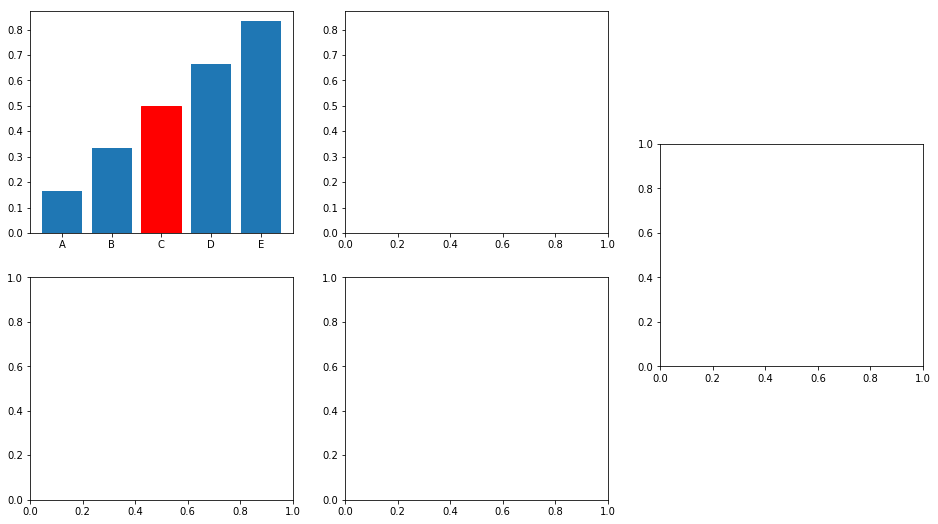

In [59]:
fig = plt.figure(figsize=(16, 9))
spec = gridspec.GridSpec(nrows=4, ncols=3, hspace=.5)
ax1 = fig.add_subplot(spec[0:2, 0])
ax2 = fig.add_subplot(spec[0:2, 1], sharey=ax1)
ax3 = fig.add_subplot(spec[2:4, 0])
ax4 = fig.add_subplot(spec[2:4, 1], sharey=ax3)
ax5 = fig.add_subplot(spec[1:3, 2])
#ax1 = plt.subplot2grid((4, 3), (0, 0), rowspan=2)
#ax2 = plt.subplot2grid((4, 3), (0, 1), sharey=ax1, rowspan=2)
#ax3 = plt.subplot2grid((4, 3), (2, 0), rowspan=2)
#ax4 = plt.subplot2grid((4, 3), (2, 1), sharey=ax3, rowspan=2)
#ax5 = plt.subplot2grid((4, 3), (1, 2), rowspan=2)

#Ax1
bl1 = ax1.bar(df_v.columns, df_v.iloc[0])
bl1[2].set_color('r')
ax1.plot(df_v.columns, v_true, 'ys')
ax1.set_title(f'$\lambda = {df_v.index.values[0]}$')
ax1.set_ylabel('State-value function estimate')

#Ax2
bl2 = ax2.bar(df_v.columns, df_v.iloc[1])
bl2[2].set_color('r')
ax2.plot(df_v.columns, v_true, 'ys')
ax2.set_title(f'$\lambda = {df_v.index.values[1]}$')
ax2.set_ylabel('State-value function estimate')

#Ax3
ax3.plot(df_e.columns, df_e.iloc[0])
ax3.set_title(f'$\lambda = {df_e.index.values[0]}$')
ax3.set_ylabel('Eligibility')

#Ax4
ax4.plot(df_e.columns, df_e.iloc[1])
ax4.set_title(f'$\lambda = {df_e.index.values[1]}$')
ax4.set_ylabel('Eligibility')

#Ax5
ax5.plot(df_error)
ax5.set_title('RMS Error vs. true state-values')
ax5.set_ylabel('RMS Error')
ax5.set_xlabel('Episodes')

#Annotation info
i_set = 4
i_episode = 8
i = 1
text = f'Training set: {i_set}\nEpisode: {i_episode}\nTime step: {i}'
plt.figtext(.67, .81, text, fontsize=14, linespacing=1.5)

In [19]:
i_set = 4
i_episode = 10
i = 1
s = 3
text = f'Training set: {i_set}\nEpisode: {i_episode}\nTime step: {i}\nCurrent state: {s}'
with open("annotation.txt", "w") as text_file:
    text_file.write(text)

In [63]:
f = open("images/annotation.txt", "r")
content = f.read()
print(content)
f.seek(0, 0)
line_list = f.readlines()
print(ord((line_list[3].split(':')[1]).strip()) - 65)
f.close()

Training set: 2
Episode: 7
Time step: 30
Current state: B
1


In [38]:
x = range(5)
c = [chr(65 + i) for i in x]
print(c)

['A', 'B', 'C', 'D', 'E']


In [39]:
lambdas=[0.0, 0.3]
x = ['v_true'] + lambdas
x

['v_true', 0.0, 0.3]

In [41]:
df_v = pd.DataFrame(index=pd.Index(['v_true'] + lambdas, name='lambda'),
                            columns=[1, 2, 3])
df_v

,1,2,3
lambda,,,
v_true,NaN,NaN,NaN
0.0,NaN,NaN,NaN
0.3,NaN,NaN,NaN


In [52]:
from collections import defaultdict

rms = defaultdict(list)
for i_set in range(100):
    for i_episode in range(10):
        rms[i_episode].append(np.random.normal(i_episode, 0.1))
        
    V = [np.mean(v) for k, v in rms.items()]
    if i_set == 50:
        print(V)


[0.03499234731653723, 1.0016179404634624, 2.0225847310328446, 3.0069292733248383, 4.001726650125663, 4.993501429505612, 6.000278200109143, 6.987460267235209, 7.993845781339431, 8.985200554825216]
